In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df=pd.read_csv(r'D:\Data_Science\Python\ass\ass2\Ecommerce - UK Retailer.csv',encoding='unicode_escape')

In [3]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
df['Year'] = df.InvoiceDate.dt.year
df['Month'] = df.InvoiceDate.dt.month
df['Year_Month']=df.InvoiceDate.map(lambda x: 100*x.year + x.month)
df['Day']=df.InvoiceDate.dt.dayofweek
df['Hour']=df.InvoiceDate.dt.hour
df['Revenue']=df['Quantity'] * df['UnitPrice']
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Year         541909 non-null  int64         
 9   Month        541909 non-null  int64         
 10  Year_Month   541909 non-null  int64         
 11  Day          541909 non-null  int64         
 12  Hour         541909 non-null  int64         
 13  Revenue      541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 57.9+ MB


# 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Year                0
Month               0
Year_Month          0
Day                 0
Hour                0
Revenue             0
dtype: int64

In [5]:
df['CustomerID']=df["CustomerID"].fillna(df["CustomerID"].mean())

In [6]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
Year              0
Month             0
Year_Month        0
Day               0
Hour              0
Revenue           0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Year           0
Month          0
Year_Month     0
Day            0
Hour           0
Revenue        0
dtype: int64

#    3. Remove duplicate rows

In [9]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Year_Month,Day,Hour,Revenue
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,2010,12,201012,2,11,1.25
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2010,12,201012,2,11,2.10
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,2010,12,201012,2,11,2.95
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,2010,12,201012,2,11,4.95
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom,2010,12,201012,2,11,2.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom,2011,12,201112,4,11,0.39
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,2011,12,201112,4,11,2.49
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom,2011,12,201112,4,11,1.95
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom,2011,12,201112,4,11,2.10


In [10]:
df=df.drop_duplicates(keep=False)

In [11]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Year_Month,Day,Hour,Revenue


# 4. Remove rows which have negative values in Quantity column

In [12]:
df=df[df['Quantity']>=0]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520615 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    520615 non-null  object        
 1   StockCode    520615 non-null  object        
 2   Description  520615 non-null  object        
 3   Quantity     520615 non-null  int64         
 4   InvoiceDate  520615 non-null  datetime64[ns]
 5   UnitPrice    520615 non-null  float64       
 6   CustomerID   520615 non-null  float64       
 7   Country      520615 non-null  object        
 8   Year         520615 non-null  int64         
 9   Month        520615 non-null  int64         
 10  Year_Month   520615 non-null  int64         
 11  Day          520615 non-null  int64         
 12  Hour         520615 non-null  int64         
 13  Revenue      520615 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 59.6+ MB


# 5. Add the columns - Month, Day and Hour for the invoice

- Already added in Line 3.

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Year_Month,Day,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,2,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,2,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,2,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,2,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,2,8,20.34


# 6. How many orders made by the customers?

In [15]:
print("The total no. of orders made by the customers is",df['Quantity'].value_counts().sum())

The total no. of orders made by the customers is 520615


# 7. TOP 5 customers with higher number of orders

In [16]:
top_order=df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
print(top_order)

      CustomerID         Country  InvoiceNo
0        12346.0  United Kingdom          1
1        12347.0         Iceland        182
2        12348.0         Finland         31
3        12349.0           Italy         73
4        12350.0          Norway         17
...          ...             ...        ...
4351     18280.0  United Kingdom         10
4352     18281.0  United Kingdom          7
4353     18282.0  United Kingdom         12
4354     18283.0  United Kingdom        688
4355     18287.0  United Kingdom         70

[4356 rows x 3 columns]


In [17]:
print('\nThe top 5 Customers are:')
top_order.sort_values(by='InvoiceNo', ascending=False).head()


The top 5 Customers are:


,CustomerID,Country,InvoiceNo
2176,15287.69057,United Kingdom,131300
4028,17841.00000,United Kingdom,7523
1888,14911.00000,EIRE,5667
1298,14096.00000,United Kingdom,5111
334,12748.00000,United Kingdom,4243


# 8. How much money spent by the customers?

In [18]:
money=df.groupby(by=['CustomerID','Country'], as_index=False)['Revenue'].sum()
print(money)

      CustomerID         Country   Revenue
0        12346.0  United Kingdom  77183.60
1        12347.0         Iceland   4310.00
2        12348.0         Finland   1797.24
3        12349.0           Italy   1757.55
4        12350.0          Norway    334.40
...          ...             ...       ...
4351     18280.0  United Kingdom    180.60
4352     18281.0  United Kingdom     80.82
4353     18282.0  United Kingdom    178.05
4354     18283.0  United Kingdom   1998.68
4355     18287.0  United Kingdom   1837.28

[4356 rows x 3 columns]


# 9. TOP 5 customers with highest money spent

In [19]:
money.sort_values(by='Revenue', ascending=False).head()

,CustomerID,Country,Revenue
2176,15287.69057,United Kingdom,1694485.90
1698,14646.00000,Netherlands,280206.02
4219,18102.00000,United Kingdom,259657.30
3746,17450.00000,United Kingdom,194230.79
3026,16446.00000,United Kingdom,168472.50


# 10. How many orders per month?

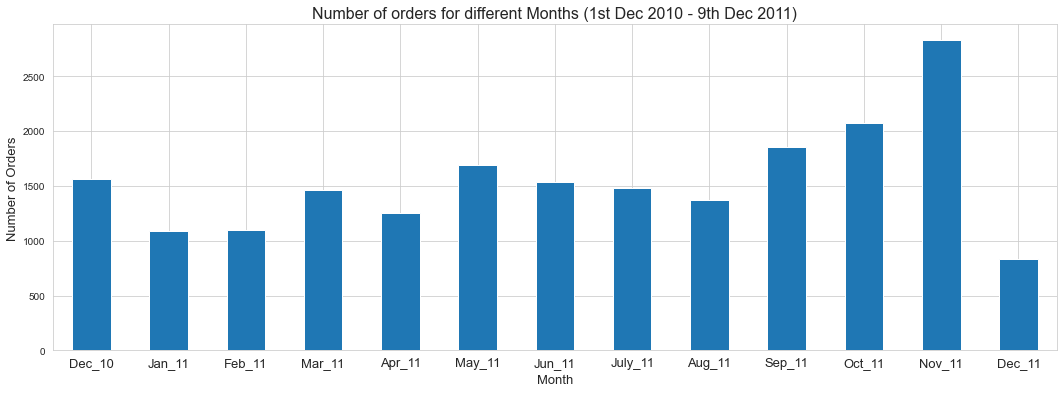

[201012]    1566
[201101]    1089
[201102]    1101
[201103]    1459
[201104]    1255
[201105]    1689
[201106]    1537
[201107]    1484
[201108]    1367
[201109]    1858
[201110]    2070
[201111]    2830
[201112]     829
Name: Year_Month, dtype: int64


In [20]:
opm=df.groupby('InvoiceNo')['Year_Month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(18,6))
opm.set_xlabel('Month',fontsize=13)
opm.set_ylabel('Number of Orders',fontsize=13)
opm.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=16)
opm.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11',
                     'Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()
print(df.groupby('InvoiceNo')['Year_Month'].unique().value_counts().sort_index())

# 11. How many orders per day?

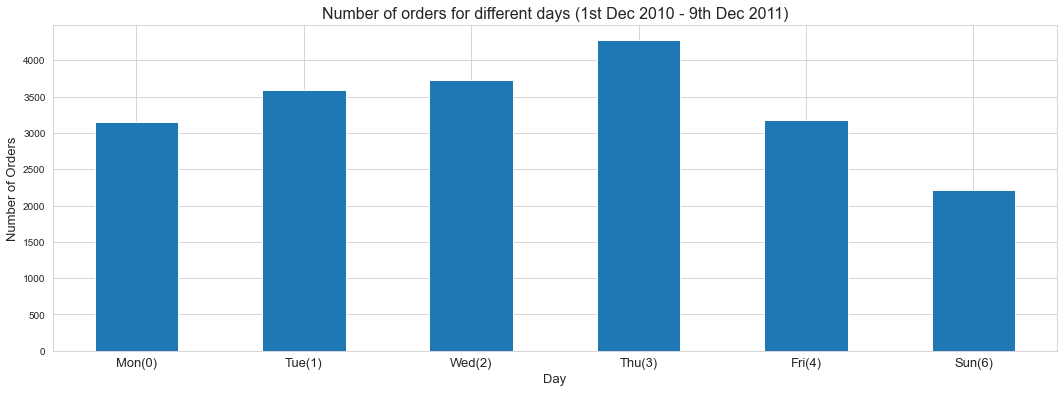

[0]    3152
[1]    3594
[2]    3728
[3]    4276
[4]    3177
[6]    2207
Name: Day, dtype: int64


In [21]:
opd=df.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(18,6))
opd.set_xlabel('Day',fontsize=13)
opd.set_ylabel('Number of Orders',fontsize=13)
opd.set_title('Number of orders for different days (1st Dec 2010 - 9th Dec 2011)',fontsize=16)
opd.set_xticklabels(('Mon(0)','Tue(1)','Wed(2)','Thu(3)','Fri(4)','Sun(6)'), rotation='horizontal', fontsize=13)
#Saturday is dropped as no orders were placed on any saturday.
plt.show()
print(df.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index())

# 12. How many orders per hour?

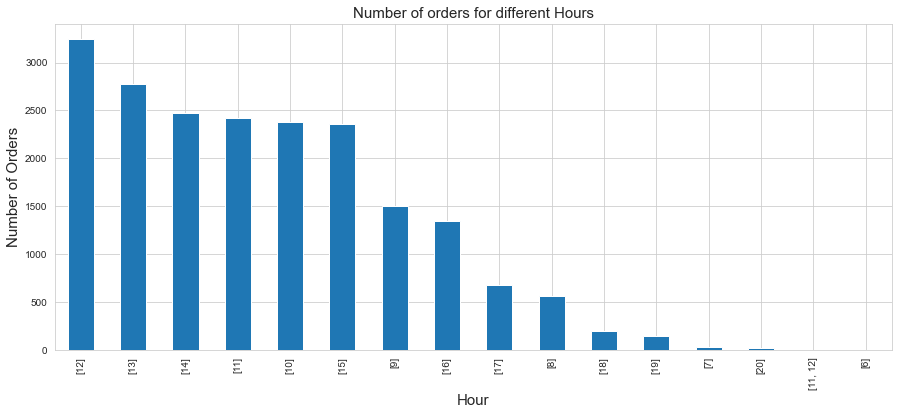

[12]        3241
[13]        2774
[14]        2473
[11]        2424
[10]        2377
[15]        2362
[9]         1501
[16]        1347
[17]         675
[8]          567
[18]         198
[19]         146
[7]           29
[20]          18
[11, 12]       1
[6]            1
Name: Hour, dtype: int64


In [22]:
oph=df.groupby('InvoiceNo')["Hour"].unique().value_counts().plot(kind='bar',figsize=(15,6))
oph.set_xlabel('Hour',fontsize=15)
oph.set_ylabel('Number of Orders',fontsize=15)
oph.set_title('Number of orders for different Hours',fontsize=15)
plt.show()
print(df.groupby('InvoiceNo')['Hour'].unique().value_counts())

# 13. How many orders for each country?

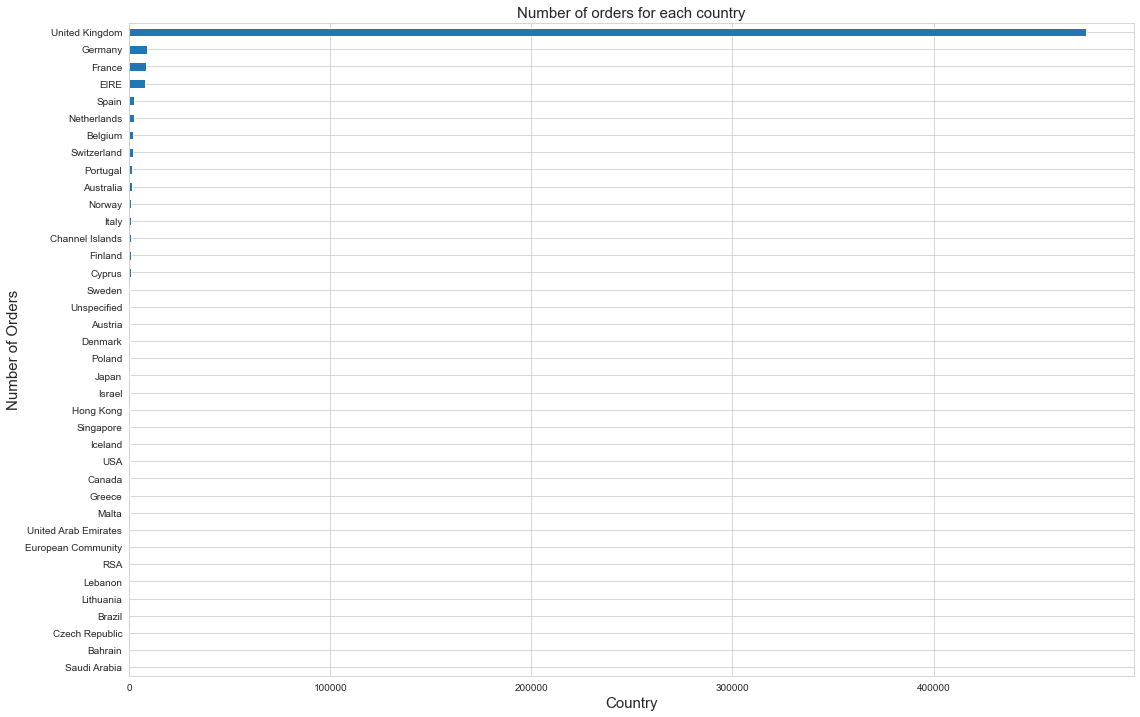

Country
United Kingdom          475790
Germany                   9012
France                    8378
EIRE                      7872
Spain                     2475
Netherlands               2363
Belgium                   2031
Switzerland               1951
Portugal                  1484
Australia                 1183
Norway                    1072
Italy                      758
Channel Islands            746
Finland                    685
Cyprus                     593
Sweden                     449
Unspecified                438
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     289
Hong Kong                  276
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


In [23]:
opc=df.groupby('Country')['InvoiceNo'].count().sort_values().plot(kind='barh',figsize=(18,12))
opc.set_xlabel('Country',fontsize=15)
opc.set_ylabel('Number of Orders',fontsize=15)
opc.set_title('Number of orders for each country',fontsize=15)
plt.show()
print(df.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False))

# 14. Orders trend across months

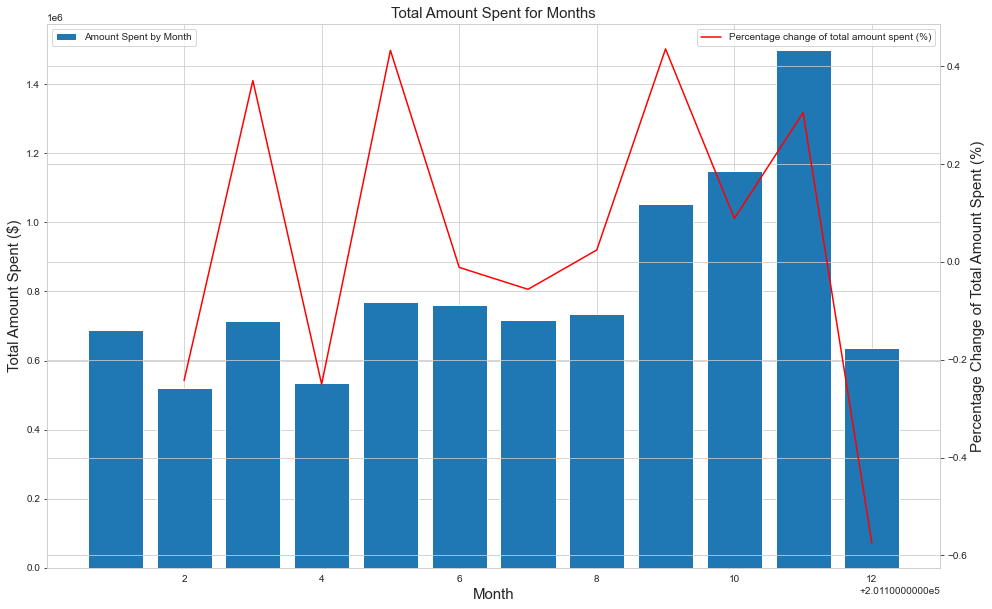

In [24]:
fig = plt.figure(figsize=(16,10))
otm = fig.add_subplot(111)
otm.set_xlabel('Month',fontsize=15)
otm.set_ylabel('Total Amount Spent ($)',fontsize=15)
otm.set_title('Total Amount Spent for Months',fontsize=15)
otm.bar(df.groupby(by=['Year_Month'])['Revenue'].sum().index.tolist()[1:],df.groupby(by=['Year_Month'])['Revenue'].sum()[1:],
        label='Amount Spent by Month')
otm1 = otm.twinx()
otm1.set_ylabel('Percentage Change of Total Amount Spent (%)',fontsize=15)
otm1.plot(df.groupby(by=['Year_Month'])['Revenue'].sum().index.tolist()[1:], df.groupby(by=['Year_Month'])['Revenue'].sum()[1:].pct_change(),
         label='Percentage change of total amount spent (%)',color='red')
otm.legend(loc='upper left')
otm1.legend(loc='upper right')
plt.show()

# 15. How much money spent by each country?

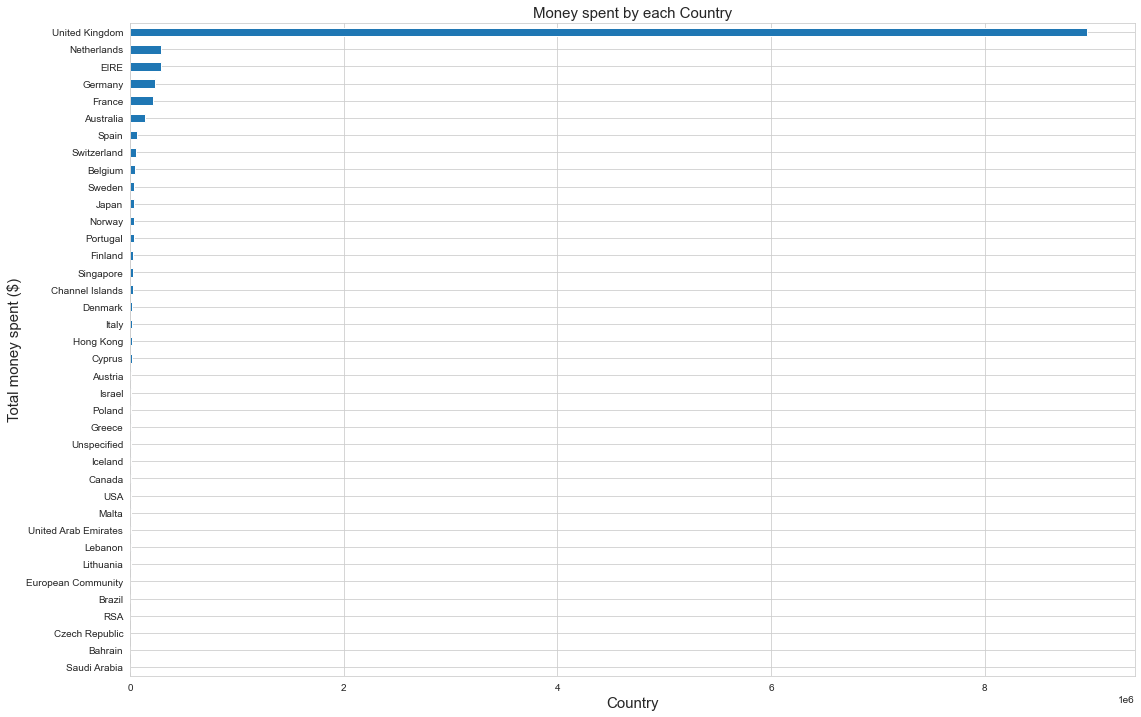

Country
United Kingdom          8957894.104
Netherlands              285446.340
EIRE                     282827.080
Germany                  228489.660
France                   209535.630
Australia                138386.310
Spain                     61540.010
Switzerland               57045.300
Belgium                   41196.340
Sweden                    38357.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33621.550
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20430.640
Denmark                   18955.340
Italy                     17483.240
Hong Kong                 15274.200
Cyprus                    13419.470
Austria                   10198.680
Israel                     8123.560
Poland                     7334.650
Greece                     4760.520
Unspecified                4732.090
Iceland                    4310.000
Canada                     3666.380
USA                 

In [25]:
mpc=df.groupby('Country')['Revenue'].sum().sort_values().plot(kind='barh',figsize=(18,12))
mpc.set_xlabel('Country',fontsize=15)
mpc.set_ylabel('Total money spent ($)',fontsize=15)
mpc.set_title('Money spent by each Country',fontsize=15)
plt.show()
print(df.groupby('Country')['Revenue'].sum().sort_values(ascending=False))